# Crypto vs the Market

## Initial project setup

In [23]:
# Initial imports
import os
import pandas as pd
import hvplot.pandas
import pandas_ta as ta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [24]:
# Load the environment variables from the .env file
load_dotenv()

True

In [25]:
# Set the variables for the Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [26]:
# Create the Alpaca API REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "V2"
)

## Alpaca API Data Import

#### Market Data

In [27]:
# Set ticker to SPY
tickers = "SPY"

# Set timeframe to 1Day
timeframe = "1Day"

# Set the start and end date
start_date = pd.Timestamp("2018-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()

In [28]:
# Use Alpaca get_bars function to get data for SPY
spy_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Concatenate the ticker dataframe
spy_prices_df = pd.concat([spy_prices_df], axis=1, keys=["SPY"])

# Use .head() to verify
spy_prices_df.head()

SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2018-07-02 04:00:00+00:00  269.51  272.04  269.240  271.86  63769156   
2018-07-03 04:00:00+00:00  272.88  272.98  270.420  270.90  42201071   
2018-07-05 04:00:00+00:00  272.16  273.18  270.960  273.11  57441049   
2018-07-06 04:00:00+00:00  273.14  275.84  272.715  275.42  66693896   
2018-07-09 04:00:00+00:00  276.56  277.96  276.500  277.90  51771719   

                                                   
                          trade_count        vwap  
timestamp                                          
2018-07-02 04:00:00+00:00      279127  270.689557  
2018-07-03 04:00:00+00:00      180591  271.716151  
2018-07-05 04:00:00+00:00      260592  272.247814  
2018-07-06 04:00:00+00:00      269826  274.929843  
2018-07-09 04:00:00+00:00      212828  277.260701

#### Crypto Data

In [29]:
# Set ticker to BTCUSD
tickers = "BTCUSD"

# Set timeframe to 1Day
timeframe = "1Day"

# Set the start and end date
start_date = pd.Timestamp("2018-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()

In [30]:
# Use the Alpaca get_crypto_bars function to get data for BTCUSD
btc_prices_df = alpaca.get_crypto_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Filter out all exchanges other than Coinbase and drop redundant exchange column
btc_prices_df = btc_prices_df[btc_prices_df.exchange == "CBSE"]
btc_prices_df = btc_prices_df.drop(axis=1, columns="exchange")

# Concatenate the ticker dataframe
btc_prices_df = pd.concat([btc_prices_df], axis=1, keys=["BTCUSD"])

# Use .head() to verify
btc_prices_df.head()

BTCUSD                                          \
                              open     high      low    close       volume   
timestamp                                                                    
2018-07-01 05:00:00+00:00  6349.50  6351.00  6270.01  6304.55   643.082606   
2018-07-02 05:00:00+00:00  6304.55  6669.99  6270.01  6611.79  7184.664968   
2018-07-03 05:00:00+00:00  6502.62  6518.25  6411.51  6469.00  1325.274215   
2018-07-04 05:00:00+00:00  6587.46  6700.00  6508.72  6620.99  1345.963438   
2018-07-05 05:00:00+00:00  6621.00  6684.00  6449.50  6532.95  4944.828533   

                                                    
                          trade_count         vwap  
timestamp                                           
2018-07-01 05:00:00+00:00       61723  6325.628835  
2018-07-02 05:00:00+00:00       37641  6556.943445  
2018-07-03 05:00:00+00:00        9573  6463.236479  
2018-07-04 05:00:00+00:00       57950  6606.931106  
2018-07-05 05:00:00+00:00       43786  6565.028002

## Bitcoin vs the S&P500: Long-Term - Jason

## Bitcoin vs the S&P500: Trading - Majid

## Bitcoin vs the S&P500: Monte Carlo Simulations

#### Full Four Year Predictions

*SPY*

In [33]:
# Configure the Monte Carlo simulation to forecast 4 years of SPY data
MC_SPY_4 = MCSimulation(
    portfolio_data = spy_prices_df,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252 * 4
)

# Review the simulation input data
MC_SPY_4.portfolio_data

SPY                                        \
                             open      high      low   close     volume   
timestamp                                                                 
2018-07-02 04:00:00+00:00  269.51  272.0400  269.240  271.86   63769156   
2018-07-03 04:00:00+00:00  272.88  272.9800  270.420  270.90   42201071   
2018-07-05 04:00:00+00:00  272.16  273.1800  270.960  273.11   57441049   
2018-07-06 04:00:00+00:00  273.14  275.8400  272.715  275.42   66693896   
2018-07-09 04:00:00+00:00  276.56  277.9600  276.500  277.90   51771719   
...                           ...       ...      ...     ...        ...   
2022-06-27 04:00:00+00:00  391.12  391.3600  387.440  388.59   65967268   
2022-06-28 04:00:00+00:00  390.30  393.1600  380.530  380.65   86376255   
2022-06-29 04:00:00+00:00  381.16  382.2700  378.420  380.34   64478427   
2022-06-30 04:00:00+00:00  376.27  380.6582  372.560  377.25  112269284   
2022-07-01 04:00:00+00:00  376.60  381.7000  373.800  381.24   74165514   

                                                                
                          trade_count        vwap daily_return  
timestamp                                                       
2018-07-02 04:00:00+00:00      279127  270.689557          NaN  
2018-07-03 04:00:00+00:00      180591  271.716151    -0.003531  
2018-07-05 04:00:00+00:00      260592  272.247814     0.008158  
2018-07-06 04:00:00+00:00      269826  274.929843     0.008458  
2018-07-09 04:00:00+00:00      212828  277.260701     0.009004  
...                               ...         ...          ...  
2022-06-27 04:00:00+00:00      552197  389.085434    -0.003820  
2022-06-28 04:00:00+00:00      641197  384.912075    -0.020433  
2022-06-29 04:00:00+00:00      519970  380.393953    -0.000814  
2022-06-30 04:00:00+00:00      799487  377.083807    -0.008124  
2022-07-01 04:00:00+00:00      601221  378.221516     0.010577  

[1008 rows x 8 columns]

In [34]:
# Run the Monte Carlo simulation to forecast 4 years cumulative returns
MC_SPY_4.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/majidkouki/Desktop/fintech_workspace/fintech_challenges/crypto-vs-the-market/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982512,0.998692,1.006744,1.009120,1.007360,1.010433,0.987557,0.996218,1.019770,1.014631,...,0.989309,1.000390,1.012927,0.968121,0.972566,0.995186,1.011609,0.987051,1.030046,0.970602
2,0.986188,1.015670,0.994858,0.984284,1.031459,1.027956,0.969759,0.984066,1.018433,1.004002,...,1.001089,1.009187,0.998828,0.982331,0.956540,1.009560,1.004881,0.971800,1.019768,0.971787
3,0.986848,1.023852,1.004830,0.980227,1.060299,1.024707,0.968889,0.983731,1.013353,0.989005,...,1.001835,1.007525,1.008337,0.969937,0.950322,1.009820,1.014107,0.959713,1.034646,0.984146
4,0.972268,1.036743,0.999868,0.968729,1.076500,1.025594,0.925108,0.973523,1.002956,0.985330,...,1.001887,1.016567,1.000196,0.952441,0.944118,1.002239,1.031319,0.973290,1.036892,0.986722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,1.357978,3.118029,1.694772,1.674553,1.401258,2.156976,1.925602,1.887868,3.134930,1.196246,...,1.442870,1.596483,1.424254,0.964506,0.787326,0.716934,0.781385,1.254594,1.220224,2.853074
1005,1.388278,3.078587,1.691235,1.703309,1.383497,2.217946,1.937203,1.867805,3.100519,1.175236,...,1.429578,1.614789,1.413275,0.986100,0.813163,0.705631,0.787094,1.245846,1.241963,2.802763
1006,1.406409,3.113916,1.664600,1.668669,1.346119,2.174189,1.898762,1.918529,3.099800,1.152248,...,1.436226,1.594488,1.421858,0.982444,0.821096,0.701397,0.795670,1.278694,1.257874,2.781531
1007,1.397515,3.086849,1.629019,1.685151,1.318985,2.213303,1.898631,1.899831,3.075639,1.165903,...,1.407644,1.627232,1.444746,0.988785,0.832675,0.702219,0.807619,1.306015,1.236230,2.728481


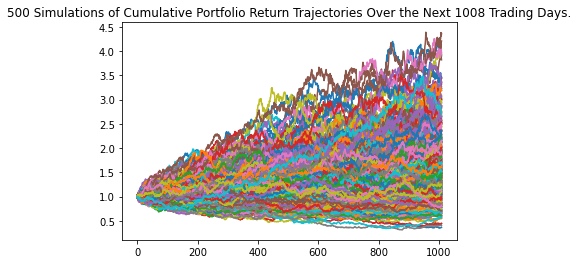

In [35]:
# Visualize the 4 year Monte Carlo simulation with a line plot
MC_SPY_4_plot = MC_SPY_4.plot_simulation()

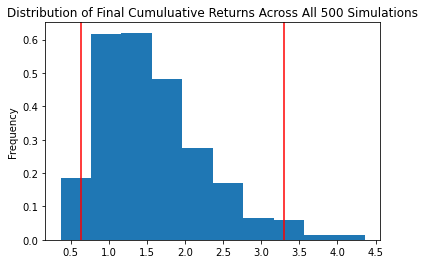

In [36]:
# Visualize the probability distribution of the 4 year Monte Carlo simulation
MC_SPY_4_dist = MC_SPY_4.plot_distribution()

In [37]:
# Generate summary statistics from the 4 year Monte Carlo simulation
MC_SPY_4_stats = MC_SPY_4.summarize_cumulative_return()

In [38]:
# Review the summary statistics
print(MC_SPY_4_stats)

count           500.000000
mean              1.577480
std               0.692671
min               0.364051
25%               1.072866
50%               1.468694
75%               1.941912
max               4.359500
95% CI Lower      0.630686
95% CI Upper      3.293370
Name: 1008, dtype: float64


*BTCUSD*

In [39]:
# Configure the Monte Carlo simulation to forecast 4 years of BTCUSD data
MC_BTC_4 = MCSimulation(
    portfolio_data = btc_prices_df,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 365 * 4
)

# Review the simulation input data
MC_BTC_4.portfolio_data

BTCUSD                                \
                               open      high       low     close   
timestamp                                                           
2018-07-01 05:00:00+00:00   6349.50   6351.00   6270.01   6304.55   
2018-07-02 05:00:00+00:00   6304.55   6669.99   6270.01   6611.79   
2018-07-03 05:00:00+00:00   6502.62   6518.25   6411.51   6469.00   
2018-07-04 05:00:00+00:00   6587.46   6700.00   6508.72   6620.99   
2018-07-05 05:00:00+00:00   6621.00   6684.00   6449.50   6532.95   
...                             ...       ...       ...       ...   
2022-06-26 05:00:00+00:00  21416.41  21866.00  20912.07  21238.56   
2022-06-27 05:00:00+00:00  21237.19  21520.00  20461.91  20750.48   
2022-06-28 05:00:00+00:00  20752.02  21189.99  20122.83  20280.74   
2022-06-29 05:00:00+00:00  20278.61  20410.91  19823.43  20025.96   
2022-06-30 05:00:00+00:00  20028.61  20879.99  18603.00  19372.13   

                                                                                
                                 volume trade_count          vwap daily_return  
timestamp                                                                       
2018-07-01 05:00:00+00:00    643.082606       61723   6325.628835          NaN  
2018-07-02 05:00:00+00:00   7184.664968       37641   6556.943445     0.048733  
2018-07-03 05:00:00+00:00   1325.274215        9573   6463.236479    -0.021596  
2018-07-04 05:00:00+00:00   1345.963438       57950   6606.931106     0.023495  
2018-07-05 05:00:00+00:00   4944.828533       43786   6565.028002    -0.013297  
...                                 ...         ...           ...          ...  
2022-06-26 05:00:00+00:00  12470.612235      459005  21289.867672    -0.008170  
2022-06-27 05:00:00+00:00  17664.933829      551532  20895.749869    -0.022981  
2022-06-28 05:00:00+00:00  16517.605222      550251  20587.194432    -0.022638  
2022-06-29 05:00:00+00:00  17130.447175      566701  20073.589943    -0.012563  
2022-06-30 05:00:00+00:00  35409.472733      817794  19433.309448    -0.032649  

[1461 rows x 8 columns]

In [40]:
# Run the Monte Carlo simulation to forecast 4 years cumulative returns
MC_BTC_4.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/majidkouki/Desktop/fintech_workspace/fintech_challenges/crypto-vs-the-market/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997379,1.028903,1.042966,1.002378,1.042646,0.960782,1.063451,0.997697,1.009734,0.957130,...,1.003754,0.966494,0.948220,0.932694,0.990396,0.988025,1.040487,1.101161,0.991836,1.069882
2,0.989634,1.051984,1.042479,0.983056,1.029984,1.013223,1.060692,1.019434,0.982832,0.927528,...,1.097090,1.016424,0.945148,0.889958,0.960035,1.042058,0.998921,1.058383,0.940282,0.998583
3,0.993115,1.067463,1.057605,0.923313,1.055462,0.958254,1.137800,1.090228,0.979941,0.857745,...,1.030696,0.988702,0.928438,0.924380,0.922112,1.060964,0.999192,1.092216,0.948474,1.014611
4,1.001803,1.031628,1.068448,0.917480,1.105904,1.002156,1.153968,1.145377,0.924090,0.781626,...,0.960640,0.998915,0.886320,0.885257,0.904235,1.038615,0.995390,0.989823,0.896393,1.088734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,8.052783,15.639263,4.052484,31.926489,12.940608,0.777100,2.354945,18.801581,36.470295,0.972576,...,4.219880,9.834406,2.187202,2.286734,0.789921,3.802607,2.246573,0.766995,7.387216,7.776961
1457,7.946276,15.286465,4.107224,31.593925,12.641318,0.764399,2.348691,18.714777,35.821159,1.017025,...,4.457260,9.708830,2.096810,2.166632,0.807827,3.692537,2.384217,0.747713,7.707189,7.608748
1458,8.138833,16.510472,4.181451,30.180544,12.380449,0.817375,2.321595,18.163601,36.603275,1.050375,...,4.679835,9.862790,1.974764,2.083619,0.838332,3.786957,2.314621,0.727976,7.765782,7.718006
1459,8.260479,16.211367,4.198931,29.308569,12.198462,0.869398,2.191689,17.862169,35.999507,0.999692,...,4.693953,10.068934,1.946087,2.079989,0.867480,3.586908,2.472653,0.796596,7.536043,7.631136


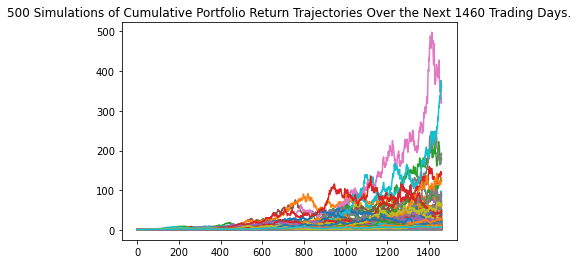

In [41]:
# Visualize the 4 year Monte Carlo simulation with a line plot
MC_BTC_4_plot = MC_BTC_4.plot_simulation()

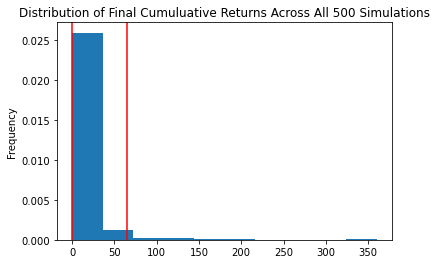

In [42]:
# Visualize the probability distribution of the 4 year Monte Carlo simulation
MC_BTC_4_dist = MC_BTC_4.plot_distribution()

In [43]:
# Generate summary statistics from the 4 year Monte Carlo simulation
MC_BTC_4_stats = MC_BTC_4.summarize_cumulative_return()

In [44]:
# Review the summary statistics
print(MC_BTC_4_stats)

count           500.000000
mean             10.747338
std              29.028819
min               0.052819
25%               1.324396
50%               3.099815
75%               7.863790
max             359.884918
95% CI Lower      0.167536
95% CI Upper     64.719022
Name: 1460, dtype: float64


#### Pre-Pandemic Predictions

*SPY*

*BTCUSD*

## Closing Notes & Analysis